##Get data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
!pip install kora
from kora.xattr import get_id

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 57 kB 2.7 MB/s 
     |████████████████████████████████| 1.6 MB 7.4 MB/s 


In [ ]:
rm -r "/content/anon012_optical"

In [ ]:
padding_size = 1000
flowFileDirPath = '/content/content/drive/MyDrive/flownet2-pytorch/resultsvideo6/inference/run.epoch-0-flow-field'
fullImgDirPath = '/content/drive/MyDrive/Y4S1_UCL/Fetoscopy Placenta Dataset/Vessel_registration_unannotated_clips/video06/images'
transformation = "Affine"
mask_path = '/content/anon012_optical/mask_anon012.png'
flowPaths =  [ flowFileDirPath + '/' + f  for f  in sorted(listdir(flowFileDirPath))]
fullImgPaths =  [ fullImgDirPath + '/' + f  for f  in sorted(listdir(fullImgDirPath))]

True

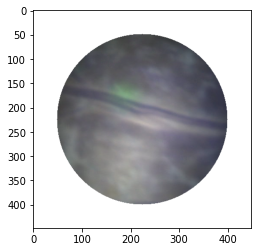

In [ ]:
#https://stackoverflow.com/questions/61516526/how-to-use-opencv-to-crop-circular-image
#edited
import cv2
import numpy as np
import matplotlib.pyplot as plt

# read image
# img = cv2.imread('/content/drive/MyDrive/Y4S1_UCL/Fetoscopy Placenta Dataset/Vessel_registration_unannotated_clips/video01/images/anon001_00851.png')
img= cv2.imread(fullImgPaths[0])
hh, ww = img.shape[:2]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 1, 255, cv2.THRESH_BINARY)[1] #changed from 60 to 1
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cXlist= []
cYlist = []
for c in cnts:
  # compute the center of the contour
  M = cv2.moments(c)
  # print(M)
  try:
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cXlist.append(cX)
    cYlist.append(cY)
    # return (cX,cY)
  except ZeroDivisionError:
    continue
cX= math.floor(sum(cXlist)/len(cXlist))
cY= math.floor(sum(cYlist)/len(cYlist))
  # return(cX,cY)

# define circles
radius2 = 175
xc = hh // 2
yc = ww // 2

# draw filled circles in white on black background as masks
mask2 = np.zeros_like(img)
mask2 = cv2.circle(mask2, (xc,yc), radius2, (255,255,255), -1)

# put mask into alpha channel of input
result = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)
result[:, :, 3] = mask2[:,:,0]

plt.figure(figsize=(10,4))
plt.imshow(result)
cv2.imwrite('/content/anon012_optical/mask_anon012.png', mask2)

In [ ]:
#get file id
flowfile= get_id("/content/drive/MyDrive/flownet2-pytorch/flow_files_anon012.zip")

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
# flowfile= get_id("/content/drive/MyDrive/flownet2-pytorch/flow_files_anon001.zip")
# mask= get_id("/content/drive/MyDrive/UCL_optical/masks")
# videofile

file_id = flowfile

fname = os.path.join('/content', 'flow_files.zip')
print('downloading to {}'.format(fname))
f_ = drive.CreateFile({'id': file_id})
f_.GetContentFile(fname)

downloading to /content/flow_files.zip


In [ ]:
!unzip flow_files.zip

Archive:  flow_files.zip
   creating: content/drive/MyDrive/flownet2-pytorch/resultsvideo6/inference/run.epoch-0-flow-field/
  inflating: content/drive/MyDrive/flownet2-pytorch/resultsvideo6/inference/run.epoch-0-flow-field/000000.flo  
  inflating: content/drive/MyDrive/flownet2-pytorch/resultsvideo6/inference/run.epoch-0-flow-field/000001.flo  
  inflating: content/drive/MyDrive/flownet2-pytorch/resultsvideo6/inference/run.epoch-0-flow-field/000002.flo  
  inflating: content/drive/MyDrive/flownet2-pytorch/resultsvideo6/inference/run.epoch-0-flow-field/000003.flo  
  inflating: content/drive/MyDrive/flownet2-pytorch/resultsvideo6/inference/run.epoch-0-flow-field/000004.flo  
  inflating: content/drive/MyDrive/flownet2-pytorch/resultsvideo6/inference/run.epoch-0-flow-field/000005.flo  
  inflating: content/drive/MyDrive/flownet2-pytorch/resultsvideo6/inference/run.epoch-0-flow-field/000006.flo  
  inflating: content/drive/MyDrive/flownet2-pytorch/resultsvideo6/inference/run.epoch-0-flo

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio
cv2.ocl.setUseOpenCL(False)
import sys
from PIL import Image
from pathlib import Path
from os import listdir

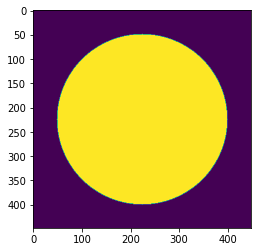

In [ ]:
#edited
mask_im = cv2.imread("/content/anon012_optical/mask_anon012.png", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,4))
plt.imshow(mask_im)

In [ ]:
def inputAndVisualizeStitchPair(srcImgPath, destImgPath, showImages=True): 
  '''
    Inputs: srcImgPath, destImgPath 
    srcImgPath : path to the image been transformed, usually the new frame seen ->str
    destImgPath : path to the image that acts as destination(src image is trasformed to it), usually the old frame->str
    Output: [srcImg, destImg] -> list
    srcImg: 256x256 representation of srcImage ->ndarray
    destImg: 256x256 representation of destImage ->ndarray
  '''
  srcImg = cv2.imread(srcImgPath)
  srcImg = cv2.cvtColor(srcImg,cv2.COLOR_BGR2RGB)
  srcImg_gray = cv2.cvtColor(srcImg, cv2.COLOR_RGB2GRAY)

  destImg = cv2.imread(destImgPath)
  destImg = cv2.cvtColor(destImg,cv2.COLOR_BGR2RGB)
  destImg_gray = cv2.cvtColor(destImg, cv2.COLOR_RGB2GRAY)

  if showImages:
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, constrained_layout=False, figsize=(10,4))
    ax1.imshow(destImg, cmap="gray")
    ax1.set_xlabel("dest image", fontsize=14)

    ax2.imshow(srcImg, cmap="gray")
    ax2.set_xlabel("Src image (Image to be transformed)", fontsize=14)
    
    plt.show()

  return [srcImg, destImg]

In [ ]:
def inputAndFormatFlowfile(flowPath):
  '''
  Input: flowPath
  flowpath: path to the .flo file between two images ->str
  Output: flow
  flow: the formated optical_flow -> ndArray of heightxbreathx2 of the image sizes 
  '''
  path = Path(flowPath) 
  with path.open(mode='r') as flo:
      np_flow = np.fromfile(flo, np.float32)
      # print(np_flow.shape)

  with path.open(mode='r') as flo:
    tag = np.fromfile(flo, np.float32, count=1)[0]
    width = np.fromfile(flo, np.int32, count=1)[0]
    height = np.fromfile(flo, np.int32, count=1)[0]

    print('tag', tag, 'width', width, 'height', height)

    nbands = 2
    tmp = np.fromfile(flo, np.float32, count= nbands * width * height)
    flow = np.resize(tmp, (int(height), int(width), int(nbands)))
    return flow

In [ ]:
def getCameraPixels(img):

  img = cv2.bitwise_and(img, img, mask=mask_im)
  # _,  imgMask = cv2.threshold(img,5,255,cv2.THRESH_BINARY)

  imgMaskGray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)


  nonZero = cv2.findNonZero(imgMaskGray)
  I,J = np.transpose(nonZero).squeeze()

  return [I, J]

In [ ]:
def pointCorrespondenceFromOpticalFlow(flow, padding, nonZeroI, nonZeroJ):
  '''
  Input: flow
  flow: the formatted optical flow file -> ndarray length,breadth,2
  padding: padding to add to destImg
  OutPut: [ptsA and ptsB] -> list
  ptsA: point correspondences in the destImg (original) -> ndarray length*breadth,2
  ptsB: point correspondences in the srcImg(new, been transformed) -> ndarray length*breadth,2
  '''
  ptsA = np.zeros(flow.shape)
  ptsB = np.zeros(flow.shape)


  for i in range(ptsA.shape[0]):
    for j in range(ptsA.shape[1]):
      ptsA[i,j] = np.array([i,j], dtype=np.float)
      ptsB[i,j] = np.array([i,j])  +  (np.array(flow[j, i]))
  
  ptsA = ptsA[nonZeroI,nonZeroJ]
  ptsB = ptsB[nonZeroI,nonZeroJ]

  return [ptsA, ptsB]

In [ ]:
def findTransformation(ptsA, ptsB, threshold=1):
  '''
    ptsA: point correspondences in the destImg (original) -> ndarray length*breadth,2
    ptsB: point correspondences in the srcImg(new, been transformed) -> ndarray length*breadth,2
    threshold: ransac threshold. 
    Output:
    H - homography
    status - mask of ransac accepted or rejected
  '''
  if transformation == "Homography":
    (H, status) = cv2.findHomography(ptsB, ptsA, cv2.RANSAC, threshold)
  elif transformation == "Affine":
    (H, status) = cv2.estimateAffine2D(ptsB, ptsA, method = cv2.RANSAC, ransacReprojThreshold = threshold)
  return [H, status]

In [ ]:
def visualizeStitch(srcImg, destImg, H, padding, showImages=False): #no showing images
  '''
  srcImg: 256x256 representation of srcImage ->ndarray
  destImg: 256x256 representation of destImage ->ndarray
  H - homography
  '''
  ht, wd, cc= destImg.shape

  ww = wd + (2*padding)
  hh = ht + (2*padding)

  xx = (ww - wd) // 2
  yy = (hh - ht) // 2

  if transformation == "Homography":
    result = cv2.warpPerspective(srcImg, H, (ww, hh))
  elif transformation == "Affine":
    result = cv2.warpAffine(srcImg, H, (ww, hh))

  alpha_s = mask_im/ 255.0
  alpha_l = 1.0 - alpha_s

  for c in range(0, 3):
      result[yy:yy+ht, xx:xx+wd, c] = (alpha_s * destImg[:, :, c] +
                                alpha_l * result[yy:yy+ht, xx:xx+wd, c])
  
  print("Visualize stitch")
  if showImages:
    plt.figure(figsize=(10,4))
    plt.imshow(result)

    plt.show()
  return (result)

In [ ]:
image_width = 256
def VisualizeOutliers(destImgPath, status, showImages):
  if showImages:
    ransac_fail = np.where(np.any(status==0, axis=1))[0]
    convert_to_pixel = lambda t: [t//image_width, t%image_width]
    outlier_pixels = np.array([convert_to_pixel(p) for p in ransac_fail])
    # print(outlier_pixels)
    destImg = Image.open(destImgPath)
    fig = plt.figure(figsize=(10,4))
    plt.xlabel("outliers",fontsize=14)
    if (outlier_pixels.size):
      plt.plot(outlier_pixels[:, 1],outlier_pixels[:, 0],'r.')
    plt.imshow(destImg)

In [ ]:
def plotPixels(img, I, J):
  fig = plt.figure(figsize=(10,4))
  plt.plot(I,J,'r.')
  plt.imshow(img)
  plt.show()

### mosaic registration

I used a crude way to make the mosaic here. I placed the first image into a very big blank canvas, then warped all the consecutive images towards it. 

There is a better method where you can choose whichever image you want as reference frame (such as the center image). This is shown in the get_lucas_kanade_mosaic.ipynb file and the global_registration_ongoing.ipynb file 

In [ ]:
def pointCorrespondenceWithoutPadding(flow, nonZeroI, nonZeroJ):
  '''
  Input: flow
  flow: the formatted optical flow file -> ndarray length,breadth,2
  padding: padding to add to destImg
  OutPut: [ptsA and ptsB] -> list
  ptsA: point correspondences in the destImg (original) -> ndarray length*breadth,2
  ptsB: point correspondences in the srcImg(new, been transformed) -> ndarray length*breadth,2
  '''
  ptsA = np.zeros(flow.shape)
  ptsB = np.zeros(flow.shape)

  for i in range(ptsA.shape[0]):
    for j in range(ptsA.shape[1]):
      ptsA[i,j] = np.array([i,j], dtype=np.float)
      ptsB[i,j] = np.array([i,j])  +  (np.array(flow[j,i]))

  ptsA = ptsA[nonZeroI,nonZeroJ]
  ptsB = ptsB[nonZeroI,nonZeroJ]

  ptsA = np.reshape(ptsA, (-1, 2))
  ptsB = np.reshape(ptsB, (-1, 2))
  return [ptsA, ptsB]

In [ ]:
def pointCorrespondenceWithPaddingForFirst(flow, nonZeroI, nonZeroJ, padding= padding_size):
  '''
  Input: flow
  flow: the formatted optical flow file -> ndarray length,breadth,2
  padding: padding to add to destImg
  OutPut: [ptsA and ptsB] -> list
  ptsA: point correspondences in the destImg (original) -> ndarray length*breadth,2
  ptsB: point correspondences in the srcImg(new, been transformed) -> ndarray length*breadth,2
  '''
  ptsA = np.zeros(flow.shape)
  ptsB = np.zeros(flow.shape)

  for i in range(ptsA.shape[0]):
    for j in range(ptsA.shape[1]):
      ptsA[i,j] = np.array([i,j], dtype=np.float) + np.array([padding,padding])
      ptsB[i,j] = np.array([i,j])  +  (np.array(flow[j,i]))


  ptsA = ptsA[nonZeroI,nonZeroJ]
  ptsB = ptsB[nonZeroI,nonZeroJ]

  ptsA = np.reshape(ptsA, (-1, 2))
  ptsB = np.reshape(ptsB, (-1, 2))
  return [ptsA, ptsB]

In [ ]:
padding = padding_size
threshold = 7
if transformation == "Homography":
  H_array = np.zeros((len(fullImgPaths)-1, 3,3 ))
elif transformation == "Affine":    
  H_array = np.zeros((len(fullImgPaths)-1, 2,3 ))
showImages = False

In [ ]:
# imgpath= fullImgPaths[:11]
imgpath= fullImgPaths
savepath= "/content/anon012_optical/" #edited
# result= None
for i in range(len(imgpath) - 1): #
  destImgPath = fullImgPaths[i] #the previous image
  srcImgPath =  fullImgPaths[i + 1];
  flowPath = flowPaths[i]

  srcImg, destImg = inputAndVisualizeStitchPair(srcImgPath, destImgPath, showImages)
  flow = inputAndFormatFlowfile(flowPath)
  I, J = getCameraPixels(destImg)

  filename= os.path.basename(destImgPath)
  filename= os.path.splitext(filename)[0]

  if i==0:
    ptsA, ptsB = pointCorrespondenceWithPaddingForFirst(flow, I, J, padding)
  else:
    ptsA, ptsB = pointCorrespondenceWithoutPadding(flow, I, J)
  H, status = findTransformation(ptsA, ptsB, threshold)
  np.savetxt(savepath+'txt/'+filename+'.txt', H) #edited

  if i==0:
    result= visualizeStitch(srcImg, destImg, H, padding, showImages)
  else:
    result= visualizeStitch(srcImg, destImg, H, 0, showImages)
  H_array[i] = H

tag 202021.25 width 448 height 448


<ipython-input-22-91a655ce463f>:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ptsA[i,j] = np.array([i,j], dtype=np.float) + np.array([padding,padding])


Visualize stitch
tag 202021.25 width 448 height 448
Visualize stitch
tag 202021.25 width 448 height 448
Visualize stitch
tag 202021.25 width 448 height 448
Visualize stitch
tag 202021.25 width 448 height 448
Visualize stitch
tag 202021.25 width 448 height 448
Visualize stitch
tag 202021.25 width 448 height 448
Visualize stitch
tag 202021.25 width 448 height 448
Visualize stitch
tag 202021.25 width 448 height 448
Visualize stitch
tag 202021.25 width 448 height 448
Visualize stitch
tag 202021.25 width 448 height 448
Visualize stitch
tag 202021.25 width 448 height 448
Visualize stitch
tag 202021.25 width 448 height 448
Visualize stitch
tag 202021.25 width 448 height 448
Visualize stitch
tag 202021.25 width 448 height 448
Visualize stitch
tag 202021.25 width 448 height 448
Visualize stitch
tag 202021.25 width 448 height 448
Visualize stitch
tag 202021.25 width 448 height 448
Visualize stitch
tag 202021.25 width 448 height 448
Visualize stitch
tag 202021.25 width 448 height 448
Visualize st

In [ ]:
H_global =  np.zeros((len(fullImgPaths)-1, 3,3 ))

In [ ]:
def getHGlobalRecursively(pos = 0, new_H = np.eye(3)):
  if pos == H_array.shape[0]:
    return 1
  if transformation == "Homography":
    new_H = np.matmul(new_H, H_array[pos] ) 
  elif transformation == "Affine":  
    new_H = np.matmul(new_H, np.vstack([H_array[pos], [0,0,1]]) )  
  
  H_global[pos] = new_H
  pos = pos+1;
  getHGlobalRecursively(pos,new_H)

getHGlobalRecursively()

In [ ]:
!mkdir globalRegistrationTransparent

mkdir: cannot create directory ‘globalRegistrationTransparent’: File exists


In [ ]:
def globalImageRegistration(srcImg, destImg, index, imageName, padding=padding_size):
  ht, wd, cc= destImg.shape

  ww = wd + (2*padding)
  hh = ht + (2*padding)

  xx = (ww - wd) // 2
  yy = (hh - ht) // 2

  srcImg = cv2.bitwise_and(srcImg, srcImg, mask=mask_im)
  
  result = cv2.warpPerspective(srcImg, H_global[index], (ww, hh))

  return result

In [ ]:
def getTransparentImg(src, imageName):
  tmp = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
  _,alpha = cv2.threshold(tmp,0,255,cv2.THRESH_BINARY)
  r, g, b = cv2.split(src)
  rgba = [b,g,r, alpha]
  dst = cv2.merge(rgba,4)
  save_name = "/content/transparent/" + imageName
  cv2.imwrite(save_name, dst)

In [ ]:
def globalRegistrationFirstImage(img, imageName, padding=padding_size):
  ht, wd, cc= img.shape

  ww = wd + (2*padding)
  hh = ht + (2*padding)

  color = (0,0,0)
  result = np.full((hh,ww,cc), color, dtype=np.uint8)

  xx = (ww - wd) // 2
  yy = (hh - ht) // 2

  # copy img image into center of result image
  
  img =cv2.bitwise_and(img, img, mask=mask_im)
  
  result[yy:yy+ht, xx:xx+wd] = img

  return result

In [ ]:
from tqdm import tqdm
# imgpath= fullImgPaths[:31] #edited
imgpath= fullImgPaths
savepath= "/content/anon012_optical/mosaic"

for i in tqdm(range(len(imgpath)-1)): #edited
# for i in range(len(fullImgPaths) - 1):
  destImgPath = fullImgPaths[0] #the first image
  srcImgPath =  fullImgPaths[i + 1];
  srcImg, destImg = inputAndVisualizeStitchPair(srcImgPath, destImgPath, False)
  if (i == 0):
    # add reference image which is the first image
    imageName = Path(fullImgPaths[i]).name
    src = globalRegistrationFirstImage(destImg, imageName)
    cv2.imwrite(os.path.join(savepath, imageName), src) #added
    getTransparentImg(src, imageName)

  imageName = Path(fullImgPaths[i + 1]).name
  src = globalImageRegistration(srcImg, destImg, i, imageName)
  cv2.imwrite(os.path.join(savepath, imageName), src) #added
  getTransparentImg(src, imageName)

100%|██████████| 99/99 [00:33<00:00,  2.92it/s]


True

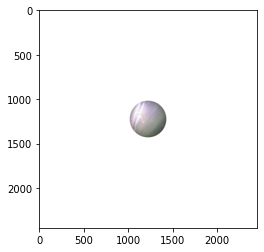

In [ ]:
#create a mask for the transparent images since they form a circle crop with some dark lines around the image
# read image
img = cv2.imread('/content/anon005_optical/transparent/anon002_01751.png')

hh, ww = img.shape[:2]
hh2 = hh // 2
ww2 = ww // 2

# define circles
# radius1 = 25
radius2 = 205
xc = hh // 2
yc = ww // 2

# draw filled circles in white on black background as masks
mask2 = np.zeros_like(img)
mask2 = cv2.circle(mask2, (xc,yc), radius2, (255,255,255), -1)

# subtract masks and make into single channel
# mask = cv2.subtract(mask2, mask1)

# put mask into alpha channel of input
result = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)
result[:, :, 3] = mask2[:,:,0]

plt.figure(figsize=(10,4))
plt.imshow(result)
cv2.imwrite('/content/anon002/anon002_transparentmask.png', mask2)
# cv2.imwrite('/content/anon002_transparentsample.png', result)

In [ ]:
#from https://pyimagesearch.com/2016/02/01/opencv-center-of-contour/
import matplotlib.pyplot as plt
import imutils
import math

#hough circle to detect center of circle
def findcenter(gray):#, image):
  blurred = cv2.GaussianBlur(gray, (5, 5), 0)
  thresh = cv2.threshold(blurred, 1, 255, cv2.THRESH_BINARY)[1] #changed from 60 to 1
  cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cnts = imutils.grab_contours(cnts)
  # print(len(cnts))
  #RETR_EXTERNAL
  # print(cnts[0])
  cXlist= []
  cYlist = []
  for c in cnts:
    # compute the center of the contour
    M = cv2.moments(c)
    # print(M)
    try:
      cX = int(M["m10"] / M["m00"])
      cY = int(M["m01"] / M["m00"])
      cXlist.append(cX)
      cYlist.append(cY)
      # return (cX,cY)
    except ZeroDivisionError:
      continue
  cX= math.floor(sum(cXlist)/len(cXlist))
  cY= math.floor(sum(cYlist)/len(cYlist))
  return(cX,cY)

# imgg= cv2.imread("/content/anon002/transparent/anon002_01790.png")
# gray = cv2.cvtColor(imgg, cv2.COLOR_BGR2GRAY)
# cX,cY= findcenter(gray, imgg)



# plt.figure(figsize=(10,4))
# # plt.imshow(gray)


def getmaskedimg(img, coorx,coory):
  radius2 = 110
  mask2 = np.zeros_like(img)
  mask2 = cv2.circle(mask2, (coorx,coory), radius2, (255,255,255), -1)
  result = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)
  result[:, :, 3] = mask2[:,:,0]
  return result

  # plt.figure(figsize=(10,4))
  # plt.imshow(result)  

# imgg= cv2.imread("/content/anon002/transparent/anon002_01790.png")
# getmaskedimg(imgg, cX,cY)


In [ ]:
# !zip -r /content/anon001_mosaic.zip /content/anon001_mosaic
# !zip -r /content/anon001_transparent.zip /content/anon001_transparent
# !zip -r /content/globalRegistrationTransparent.zip /content/globalRegistrationTransparent
!zip -r /content/anon001_mosaick_txt_video.zip /content/drive/MyDrive/UCL_optical/mosaicking

  adding: content/drive/MyDrive/UCL_optical/mosaicking/ (stored 0%)
  adding: content/drive/MyDrive/UCL_optical/mosaicking/anon001/ (stored 0%)
  adding: content/drive/MyDrive/UCL_optical/mosaicking/anon001/txt/ (stored 0%)
  adding: content/drive/MyDrive/UCL_optical/mosaicking/anon001/txt/anon001_00851.txt (deflated 35%)
  adding: content/drive/MyDrive/UCL_optical/mosaicking/anon001/txt/anon001_00852.txt (deflated 35%)
  adding: content/drive/MyDrive/UCL_optical/mosaicking/anon001/txt/anon001_00853.txt (deflated 36%)
  adding: content/drive/MyDrive/UCL_optical/mosaicking/anon001/txt/anon001_00854.txt (deflated 34%)
  adding: content/drive/MyDrive/UCL_optical/mosaicking/anon001/txt/anon001_00855.txt (deflated 37%)
  adding: content/drive/MyDrive/UCL_optical/mosaicking/anon001/txt/anon001_00856.txt (deflated 34%)
  adding: content/drive/MyDrive/UCL_optical/mosaicking/anon001/txt/anon001_00857.txt (deflated 36%)
  adding: content/drive/MyDrive/UCL_optical/mosaicking/anon001/txt/anon001_0

In [ ]:
from google.colab import files
# files.download("/content/anon001_mosaic.zip")
# files.download("/content/anon001_transparent.zip")
# files.download("/content/globalRegistrationTransparent.zip")
files.download("/content/anon001_mosaick_txt_video.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#RETRYING THIS to get cropped circle 

def croptransparent(imgpath,savepath):
  imgpaths =  [ imgpath + '/' + f  for f  in sorted(listdir(imgpath))]
  # imgpaths= imgpaths[:11]
  for i in tqdm(range(len(imgpaths)-1)):
    imgg= imgpaths[i]
    # print(imgpaths[i])
    img= cv2.imread(imgg)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    coorx,coory= findcenter(gray)
    result= getmaskedimg(img, coorx,coory)
    # result= getmaskedimg(img, gray)
    # result[:, :, 3] = mask2[:,:,0]
    imageName = Path(imgg).name
    cv2.imwrite(os.path.join(savepath, imageName), result)
    # print(os.path.join(savepath, imageName))
# maskimpath = "/content/anon001_transparentmask.png"
imgpath= "/content/transparent"
savepath= "/content/anon012_optical/transparent"
croptransparent(imgpath, savepath)

100%|██████████| 99/99 [00:22<00:00,  4.35it/s]


In [ ]:
def overlay_transparent(bg_img, img_to_overlay_t):
    """
    Overlay new image on background only in positions where warped image is.
    :param bg_img: background image
    :param img_to_overlay_t: new image with transparent background
    :return:
    """
    # Extract the alpha mask of the RGBA image, convert to RGB
    b,g,r,a = cv2.split(img_to_overlay_t)
    overlay_color = cv2.merge((b,g,r))

    #reduce size of image
    # bg_img = get_square_in_image(bg_img)

    # Black-out the area behind the logo in our original ROI
    # img1_bg = cv2.bitwise_and(bg_img.copy(), bg_img.copy(), mask = cv2.bitwise_not(a))
    img1_bg = cv2.bitwise_and(bg_img, bg_img, mask=cv2.bitwise_not(a))

    # Mask out the logo from the logo image.
    img2_fg = cv2.bitwise_and(overlay_color, overlay_color, mask = a)

    # Update the original image with our new ROI
    bg_img = cv2.add(img1_bg, img2_fg)

    return bg_img

def generate_video(image_folder, video_name, video_frames_path):
    images = [img for img in os.listdir(image_folder)
            if img.endswith(".jpg") or
            img.endswith(".jpeg") or
            img.endswith("png") or
            img.endswith("tif")]

    images.sort()
    frame = cv2.imread(os.path.join(image_folder, images[0]))
    height, width, layers = frame.shape

    fourcc= cv2.VideoWriter_fourcc(*'mp4v')
    # video = cv2.VideoWriter(video_frames_path + '/' + video_name, fourcc, 1, (width, height))
    video = cv2.VideoWriter(video_frames_path + '/' + video_name, fourcc, 1, (width, height))
    # Appending the images to the video one by one
    video_frame = np.zeros((height, width, 3), np.uint8)
    # images= images[:31]
    for i in tqdm(range(len(images))):
    # for image in images:
        image= images[i]
        img = cv2.imread(os.path.join(image_folder, image), cv2.IMREAD_UNCHANGED)
        video_frame = overlay_transparent(video_frame, img) #changed
        cv2.imwrite(os.path.join(video_frames_path, "video",image), video_frame)
        video.write(video_frame)

        # Deallocating memories taken for window creation
    cv2.destroyAllWindows()
    video.release() 

video_frames_path= "/content/anon012_optical/mosaic"
image_folder= "/content/anon012_optical/transparent" #transparent images
video_name= "anon012.mp4"
generate_video(image_folder, video_name, video_frames_path)

100%|██████████| 99/99 [00:16<00:00,  5.83it/s]


In [ ]:
!zip -r /content/anon012_optical.zip /content/anon012_optical

updating: content/anon012_optical/ (stored 0%)
updating: content/anon012_optical/mask_anon012.png (deflated 35%)
updating: content/anon012_optical/txt/ (stored 0%)
updating: content/anon012_optical/txt/anon012_26580.txt (deflated 36%)
updating: content/anon012_optical/txt/anon012_26547.txt (deflated 36%)
updating: content/anon012_optical/txt/anon012_26513.txt (deflated 35%)
updating: content/anon012_optical/txt/anon012_26582.txt (deflated 36%)
updating: content/anon012_optical/txt/anon012_26589.txt (deflated 35%)
updating: content/anon012_optical/txt/anon012_26529.txt (deflated 35%)
updating: content/anon012_optical/txt/anon012_26564.txt (deflated 37%)
updating: content/anon012_optical/txt/anon012_26512.txt (deflated 36%)
updating: content/anon012_optical/txt/anon012_26549.txt (deflated 36%)
updating: content/anon012_optical/txt/anon012_26588.txt (deflated 35%)
updating: content/anon012_optical/txt/anon012_26560.txt (deflated 35%)
updating: content/anon012_optical/txt/anon012_26555.txt